In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
df=pd.read_csv('train_data_mod.csv')
df

,hotel.id: Descending,includes_weekend: Descending,is_cardless: Descending,is_prepaid: Descending,checkin_date: Descending,nights: Descending,number_of_rooms: Descending,hotel.stars: Descending,hotel.type.keyword: Descending,customer.country_code.keyword: Descending,hotel.country_en.keyword: Descending,hotel.city_en.keyword: Descending,customer.platform.keyword: Descending,created_at per day,cancelled: Descending
0,822620,0,1,0,"July 9, 2017",1,1,0,Hotel,SA,Saudi Arabia,Jeddah,iPhoneApp,"July 3, 2017",1
1,27032,0,0,0,"December 4, 2017",1,1,4,Hotel,SA,Egypt,Cairo,iPhoneApp,"December 4, 2017",0
2,452806,1,0,0,"June 28, 2017",7,1,5,Hotel Resort,SA,Indonesia,Nusa Dua,Chrome,"June 19, 2017",0
3,621754,0,0,0,"February 26, 2017",3,1,3,Hotel,SA,United Arab Emirates,Dubai,iPhoneApp,"February 20, 2017",1
4,205042,0,0,1,"October 15, 2017",1,1,2,Hotel,AE,United Arab Emirates,Abu Dhabi,AndroidApp,"October 9, 2017",0
5,19540,0,0,0,"July 2, 2017",2,1,4,Hotel,SA,Bahrain,Manama,iPhoneApp,"June 26, 2017",0
6,874298,0,1,0,"June 13, 2017",1,1,0,Apartment,SA,Saudi Arabia,Makkah (Mecca),iPhoneApp,"June 12, 2017",1
7,645300,1,0,0,"September 23, 2017",1,1,3,Hotel,KW,Kuwait,Hawally,iPhoneApp,"September 18, 2017",1
8,11492,0,0,0,"August 17, 2017",1,1,4,Villa,PS,Palestine,Jericho,iPhoneApp,"August 14, 2017",0
9,42296,1,0,0,"April 14, 2017",1,1,5,Hotel,SA,Saudi Arabia,Madinah,iPhoneApp,"April 10, 2017",0


# 1. Explore data

 Shape of Data

In [10]:
df.shape

(1201, 15)

In [13]:
df.columns

Index(['hotel.id: Descending', 'includes_weekend: Descending',
       'is_cardless: Descending', 'is_prepaid: Descending',
       'checkin_date: Descending', 'nights: Descending',
       'number_of_rooms: Descending', 'hotel.stars: Descending',
       'hotel.type.keyword: Descending',
       'customer.country_code.keyword: Descending',
       'hotel.country_en.keyword: Descending',
       'hotel.city_en.keyword: Descending',
       'customer.platform.keyword: Descending', 'created_at per day',
       'cancelled: Descending'],
      dtype='object')

Distribution of Data 

In [14]:
print(len(df[df['cancelled: Descending']==1]))
print(len(df[df['cancelled: Descending']==0]))

335
866


Type of Columns

In [15]:
for i in range(len(df.columns)):
    print(df.columns[i]," => ", df[df.columns[i]].dtype)   


hotel.id: Descending  =>  int64
includes_weekend: Descending  =>  int64
is_cardless: Descending  =>  int64
is_prepaid: Descending  =>  int64
checkin_date: Descending  =>  object
nights: Descending  =>  int64
number_of_rooms: Descending  =>  int64
hotel.stars: Descending  =>  int64
hotel.type.keyword: Descending  =>  object
customer.country_code.keyword: Descending  =>  object
hotel.country_en.keyword: Descending  =>  object
hotel.city_en.keyword: Descending  =>  object
customer.platform.keyword: Descending  =>  object
created_at per day  =>  object
cancelled: Descending  =>  int64


visualize Data

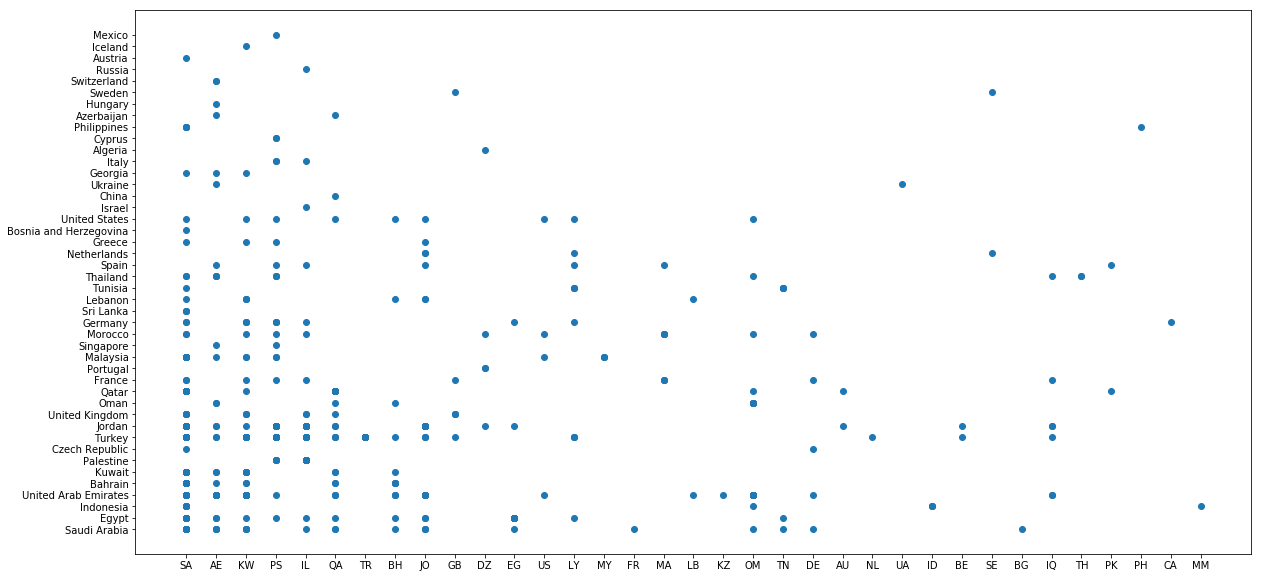

In [16]:
x=df['customer.country_code.keyword: Descending']
y=df['hotel.country_en.keyword: Descending']
plt.figure(1,figsize=(20,10))
plt.scatter(x,y)
plt.show()

# 2- Seperate headers into types of features

In [17]:
Numeric_Headers=['nights: Descending','number_of_rooms: Descending','hotel.stars: Descending']
Categorical_Headers=['hotel.id: Descending','customer.country_code.keyword','hotel.type.keyword: Descending','hotel.country_en.keyword: Descending','hotel.city_en.keyword: Descending','customer.platform.keyword: Descending']
Boolean_Headers=['is_cardless: Descending','is_prepaid: Descending','includes_weekend: Descending']
Dates_Headers=['checkin_date: Descending','created_at per day']
label=['cancelled: Descending']

# 3- Create Data Array
  #  1. for each feature, make a representation

 split the label from the features, and discover a way to represent the categorical data 
- for date: datetime library(int) it will take one column

In [18]:
is_cardlessN=df['is_cardless: Descending'].values
is_cardlessN.shape

(1201,)

Change type of checkin_date: Descending from categorical to int

In [19]:
checkin_dateN=[]
for i in range(len(df)):
    datetime_object = datetime.strptime(df['checkin_date: Descending'].values[i],'%B %d, %Y')
    x=time.mktime(datetime_object.timetuple())
    checkin_dateN.append(x)
for i in range(len(df)):
    print(checkin_dateN[i])

1499547600.0
1512334800.0
1498597200.0
1488056400.0
1508014800.0
1498942800.0
1497301200.0
1506114000.0
1502917200.0
1492117200.0
1497387600.0
1507150800.0
1504213200.0
1512853200.0
1503781200.0
1485291600.0
1505854800.0
1491253200.0
1531429200.0
1495918800.0
1495746000.0
1496264400.0
1485464400.0
1489698000.0
1485637200.0
1489006800.0
1498597200.0
1512334800.0
1514667600.0
1497128400.0
1485378000.0
1513803600.0
1485291600.0
1503349200.0
1506632400.0
1501189200.0
1505941200.0
1492290000.0
1497819600.0
1498424400.0
1501102800.0
1499893200.0
1490907600.0
1493845200.0
1501707600.0
1504299600.0
1499547600.0
1486760400.0
1504386000.0
1504731600.0
1490821200.0
1494882000.0
1493240400.0
1504299600.0
1504213200.0
1498683600.0
1485378000.0
1509570000.0
1490994000.0
1489093200.0
1510174800.0
1503090000.0
1499634000.0
1497128400.0
1510866000.0
1490389200.0
1508619600.0
1488402000.0
1500584400.0
1491166800.0
1510606800.0
1494882000.0
1507150800.0
1512334800.0
1488315600.0
1485896400.0
1499029200.0

Change type of created_at per day from categorical to int

In [20]:
created_atdayN=[]
for i in range(len(df)):
    datetime_object = datetime.strptime(df['created_at per day'].values[i],'%B %d, %Y')
    x=time.mktime(datetime_object.timetuple())
    created_atdayN.append(x)
for i in range(len(df)):
    print(created_atdayN[i])

1499029200.0
1512334800.0
1497819600.0
1487538000.0
1507496400.0
1498424400.0
1497214800.0
1505682000.0
1502658000.0
1491771600.0
1497214800.0
1503262800.0
1503867600.0
1512334800.0
1502658000.0
1483909200.0
1505682000.0
1489957200.0
1505682000.0
1495400400.0
1492981200.0
1493586000.0
1483909200.0
1489352400.0
1485118800.0
1488747600.0
1498424400.0
1511730000.0
1514149200.0
1496610000.0
1485118800.0
1513544400.0
1484514000.0
1503262800.0
1503262800.0
1500843600.0
1505682000.0
1491771600.0
1497819600.0
1497819600.0
1500843600.0
1499634000.0
1489957200.0
1492981200.0
1501448400.0
1502658000.0
1497819600.0
1486328400.0
1503867600.0
1504472400.0
1490475600.0
1494795600.0
1489352400.0
1503867600.0
1503262800.0
1496610000.0
1485118800.0
1509310800.0
1490475600.0
1485118800.0
1509915600.0
1502658000.0
1499029200.0
1496610000.0
1510520400.0
1489957200.0
1508101200.0
1488142800.0
1500238800.0
1491166800.0
1510520400.0
1492376400.0
1506286800.0
1512334800.0
1488142800.0
1485723600.0
1498424400.0

In [21]:
hotel_id = pd.Series(df['hotel.id: Descending'])
hotel_idN=pd.get_dummies(hotel_id)
hotel_idN

,2286,11176,11272,11492,11632,12142,12206,12234,12352,13018,...,1086134,1086254,1086290,1086304,1086352,1086454,1086476,1150342,1192348,1236536
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
customer_country_code = pd.Series(df['customer.country_code.keyword: Descending'])
customer_country_codeN=pd.get_dummies(customer_country_code)
customer_country_codeN

,AE,AU,BE,BG,BH,CA,DE,DZ,EG,FR,...,PK,PS,QA,SA,SE,TH,TN,TR,UA,US
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [23]:
hotel_type_keyword= pd.Series(df['hotel.type.keyword: Descending'])
hotel_type_keywordN=pd.get_dummies(hotel_type_keyword)
hotel_type_keywordN

,All Inclusive,Apart Hotel,Apartment,Bed and Breakfast,Hostel/BackPacker Accommodation,Hotel,Hotel Resort,Inn,Motel,Others,Palace,Residence,Suite,Villa
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [24]:
hotel_country_en_keyword= pd.Series(df['hotel.country_en.keyword: Descending'])
hotel_country_en_keywordN=pd.get_dummies(hotel_country_en_keyword)
hotel_country_en_keywordN

,Algeria,Austria,Azerbaijan,Bahrain,Bosnia and Herzegovina,China,Cyprus,Czech Republic,Egypt,France,...,Sri Lanka,Sweden,Switzerland,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
hotel_city_en_keyword= pd.Series(df['hotel.city_en.keyword: Descending'])
hotel_city_en_keywordN=pd.get_dummies(hotel_city_en_keyword)
hotel_city_en_keywordN

,Abha,Abu Dhabi,Ajman,Al Ahsa,Al Ain,Al Aqah,Al Baha,Al Jubail,Al Khobar,Al-Fujairah,...,Tbilisi,Toulouse,Trabzon,Tunis,Venice,Wadi Musa,West Drayton,West Palm Beach,Yanbu,Zaandam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
customer_platform_keyword= pd.Series(df['customer.platform.keyword: Descending'])
customer_platform_keywordN=pd.get_dummies(customer_platform_keyword)
customer_platform_keywordN

,AndroidApp,AndroidOS,Chrome,Edge,Firefox,IE,Safari,UNKNOWN,iOS,iPhoneApp
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1


# 2. concarenate all features

1- We convert the lists-by defualt it's created as list- into arrays then 2- we reshape every array with one dimension into 2 dimension for concatenate coz it need it to be at least 2 dimensions

In [27]:
checkin_dateN=np.array(checkin_dateN)
created_atdayN=np.array(created_atdayN)
includes_weekendN=np.array(df['includes_weekend: Descending'])  
is_cardlessN=np.array(df['is_cardless: Descending'])  
is_prepaidN=np.array(df['is_prepaid: Descending']) 
nightsN=np.array(df['nights: Descending'])
number_of_roomsN=np.array(df['number_of_rooms: Descending'])
hotel_staersN=np.array(df['hotel.stars: Descending'])

checkin_dateN=checkin_dateN.reshape((checkin_dateN.shape[0],1))
created_atdayN=created_atdayN.reshape((created_atdayN.shape[0],1))
nightsN=nightsN.reshape((nightsN.shape[0],1))
number_of_roomsN=number_of_roomsN.reshape((number_of_roomsN.shape[0],1))
hotel_staersN=hotel_staersN.reshape((hotel_staersN.shape[0],1))
is_cardlessN=is_cardlessN.reshape((is_cardlessN.shape[0],1))
is_prepaidN=is_prepaidN.reshape((is_prepaidN.shape[0],1))
includes_weekendN=includes_weekendN.reshape((includes_weekendN.shape[0],1))

Concatentate the two arrays, each time will do that to generate the whole array in integers

In [28]:
featuresN=np.concatenate((checkin_dateN, created_atdayN,nightsN,number_of_roomsN,hotel_staersN,is_cardlessN,is_prepaidN,includes_weekendN,hotel_idN,customer_country_codeN,hotel_type_keywordN,hotel_country_en_keywordN,hotel_city_en_keywordN,customer_platform_keywordN ), axis=1)

# 4- Create label Array N*1

In [29]:
cancelledLabelN=np.array(df['cancelled: Descending'])
cancelledLabelN

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

# 5- shuffle the Data

In [30]:
np.random.shuffle(featuresN) # don't do it here

# 6- Split data( train & test)

In [31]:
from sklearn.model_selection import train_test_split
x_valid,x_train,  y_valid, y_train = train_test_split(featuresN, cancelledLabelN, 
                                                    test_size=.8, 
                                                    random_state=0,shuffle=True)

# 7- Train your model (for example KNN)

# 8- Predection Test Data 

In [33]:
from sklearn.neighbors import KNeighborsClassifier as knn
clf=knn(n_neighbors=50).fit(x_train,y_train) # Training the kNN classifier
print('The accuracy on the validation set is: '+str(clf.score(x_valid,y_valid)*100)+'%')

The accuracy on the validation set is: 73.75%


# 9-Evaluate (Accurecy)

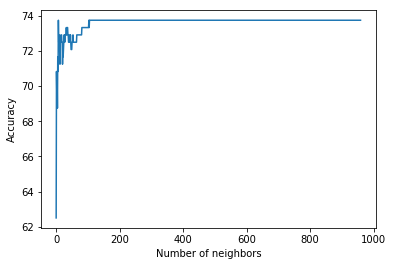

In [67]:
acc=[]
for i in range(1,len(x_train)):
    clf=knn(n_neighbors=i).fit(x_train,y_train) # Training the kNN classifier
    acc.append(clf.score(x_valid,y_valid)*100)
plt.plot(acc)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
    